In [151]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

<h3>Variáveis<h3>

In [152]:
# Variáveis de entrada
avaliacao = ctrl.Antecedent(np.arange(0, 11, 1), 'avaliacao')
preco = ctrl.Antecedent(np.arange(0, 11, 1), 'preco')
historico = ctrl.Antecedent(np.arange(0, 11, 1), 'historico')
disponibilidade = ctrl.Antecedent(np.arange(0, 11, 1), 'disponibilidade')

# Variáveis de saída
recomendacao = ctrl.Consequent(np.arange(0, 11, 1), 'recomendacao')

# Mapeamento
avaliacao['Pessima'] = fuzz.trimf(avaliacao.universe, [0, 0, 4])
avaliacao['Ruim'] = fuzz.trimf(avaliacao.universe, [3, 5, 7])
avaliacao['Boa'] = fuzz.trimf(avaliacao.universe, [6, 10, 10])

preco['Barato'] = fuzz.trimf(preco.universe, [0, 0, 5])
preco['Justo'] = fuzz.trimf(preco.universe, [4, 6, 8])
preco['Caro'] = fuzz.trimf(preco.universe, [6, 10, 10])

historico.automf(names=["Baixa", "Media", "Alta"])

disponibilidade['Baixa'] = fuzz.trimf(disponibilidade.universe, [0, 0, 4])
disponibilidade['Media'] = fuzz.trimf(disponibilidade.universe, [3, 5, 8])
disponibilidade['Alta'] = fuzz.trimf(disponibilidade.universe, [7, 10, 10])

recomendacao.automf(names=["Baixa", "Media", "Alta"])

<h3>Visualização<h3>

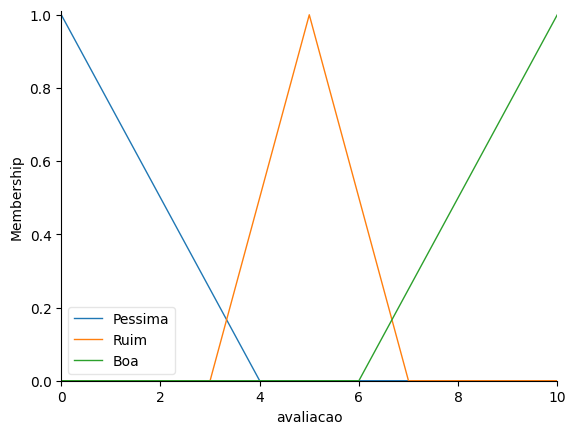

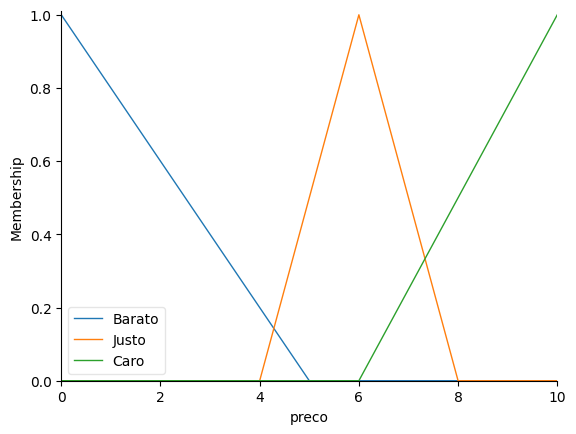

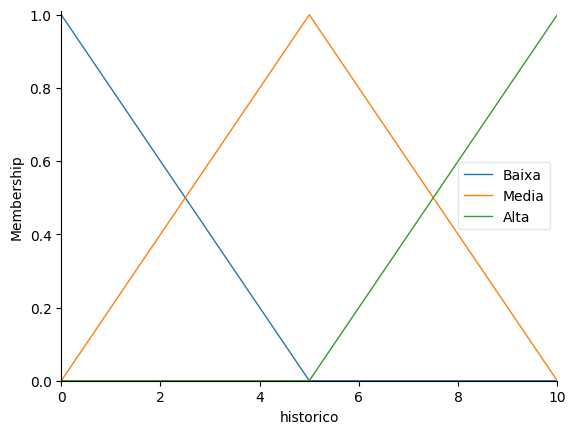

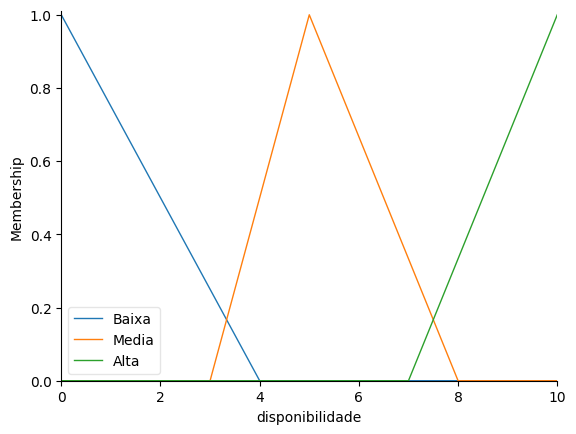

In [153]:
#visualização
avaliacao.view()
preco.view()
historico.view()
disponibilidade.view()

<h3>Regras<h3>

In [154]:
regra1 = ctrl.Rule(avaliacao['Boa'] & (preco['Barato'] | preco['Justo']) & disponibilidade['Alta'] & historico['Alta'], recomendacao['Alta'])
regra2 = ctrl.Rule(avaliacao['Pessima'] & historico['Baixa'] & disponibilidade['Alta'], recomendacao['Baixa'])
regra3 = ctrl.Rule(avaliacao['Boa'] & preco['Caro'] & disponibilidade['Alta'], recomendacao['Media'])
regra4 = ctrl.Rule(avaliacao['Boa'] & preco['Caro'] & historico['Alta'] & disponibilidade['Alta'], recomendacao['Alta'])
regra5 = ctrl.Rule(avaliacao['Ruim'] & preco['Barato'] & historico['Baixa'] & disponibilidade['Alta'], recomendacao['Media'])
regra6 = ctrl.Rule(avaliacao['Pessima'] & (preco['Barato'] | historico['Baixa']) & disponibilidade['Alta'], recomendacao['Baixa'])

<h3>Testes e Resultados<h3>

In [155]:

recomendacao_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5])
recomendacao_simulacao = ctrl.ControlSystemSimulation(recomendacao_ctrl)

recomendacao_simulacao.input['avaliacao'] = 10  # Avaliação boa
recomendacao_simulacao.input['preco'] = 5  # Preço médio
recomendacao_simulacao.input['historico'] = 8  # Histórico  alto
recomendacao_simulacao.input['disponibilidade'] = 9  # Disponibilidade alta


recomendacao_simulacao.compute()
print("Recomendação: " +str(recomendacao_simulacao.output['recomendacao']))



Recomendação: 8.055555555555555


<h3><h3>Resultado Grafico<h3><h3>

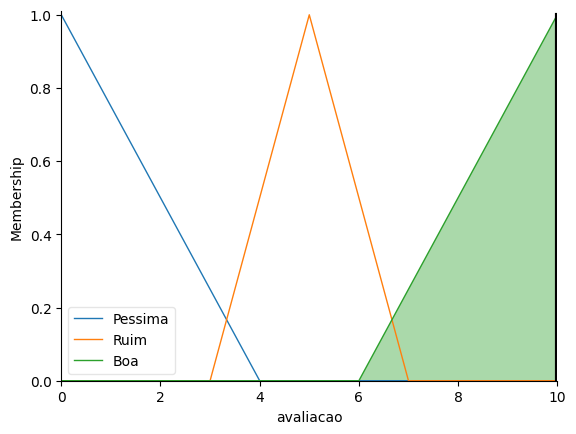

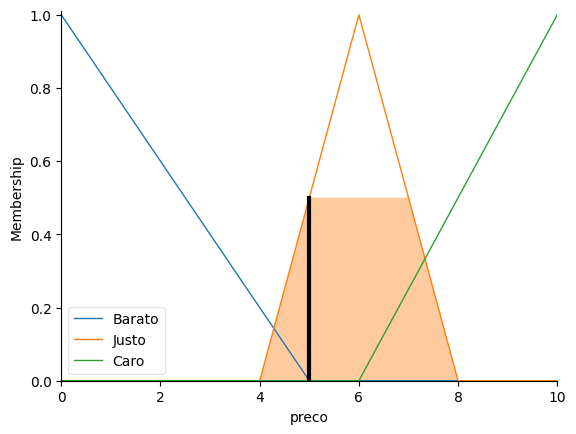

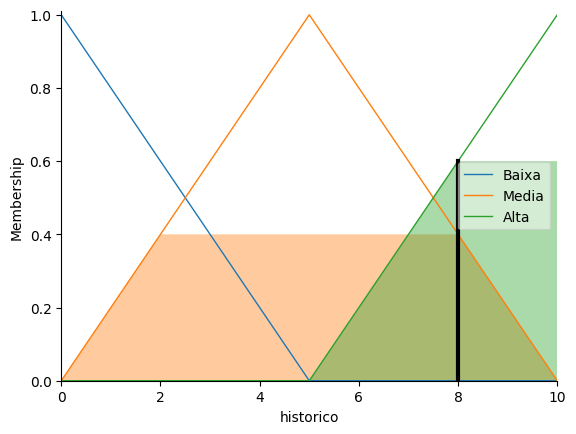

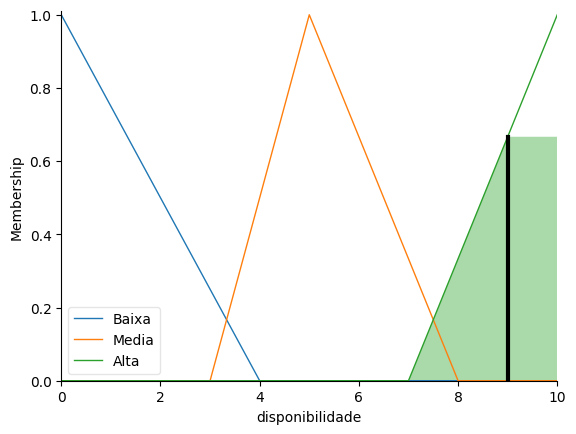

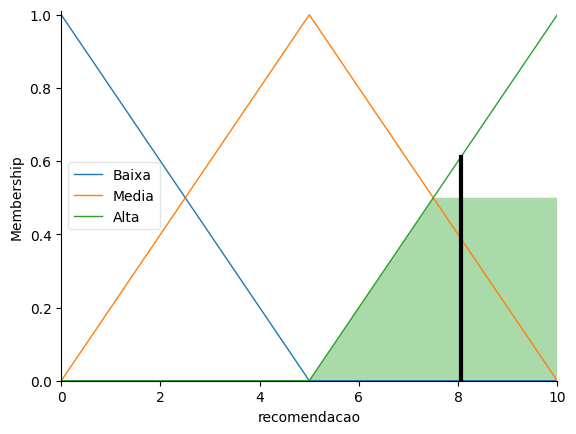

In [156]:
#Resultado Gráfico
avaliacao.view(sim  = recomendacao_simulacao)
preco.view(sim  = recomendacao_simulacao)
historico.view(sim  = recomendacao_simulacao)
disponibilidade.view(sim  = recomendacao_simulacao)

recomendacao.view(sim  = recomendacao_simulacao)
